In [24]:
import numpy as np
import matplotlib.pyplot as plt

from tsne import TSNE as TSNE
from htsne_impl import TSNE as hTSNE
from vmfsne_impl import TSNE as vmfSNE
from cosne import *
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS

from product_space_wrapped_normal import ProductSpace
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [25]:
ps = ProductSpace(signature=[(5, -1.), (5, -1.)], seed=8)
n_samples = 500
n_classes = 5
ps.sample_clusters(
    num_points=n_samples,
    num_classes=n_classes,
    cov_scale=0.3,
    sigma=1.0
)



In [26]:
tsne_model = TSNE(n_components=2,
                    perplexity=30,
                    random_state=0)
ps_X_tsne = tsne_model.fit_transform(ps.X)

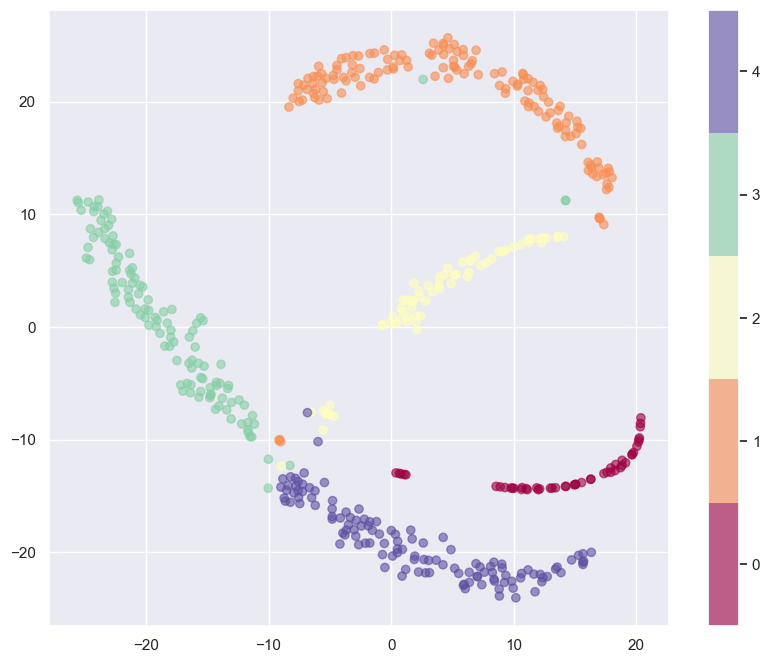

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(ps_X_tsne[:, 0], ps_X_tsne[:, 1],
                        c=ps.y.astype(int),
                        cmap='Spectral',
                        alpha=0.6)
plt.colorbar(boundaries=np.arange(n_classes+1)-0.5).set_ticks(np.arange(n_classes))
plt.savefig("./saved_figures/" + "t-SNE_psH5H5.png", bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [28]:
ps_tensor = torch.tensor(ps.X, dtype=torch.float32)
dists_ps = pmath.dist_matrix(ps_tensor, ps_tensor, c=1).numpy()

In [29]:
cosne = hTSNE(
    n_components=2,
    verbose=0,
    method='exact',
    square_distances=True,
    metric='precomputed',
    learning_rate_for_h_loss=0.1,
    student_t_gamma=0.1,
    learning_rate=5.0,
    n_iter=1000,
    perplexity=20,
    early_exaggeration=1.0,
)
ps_X_cosne = cosne.fit_transform(dists_ps, ps_tensor)

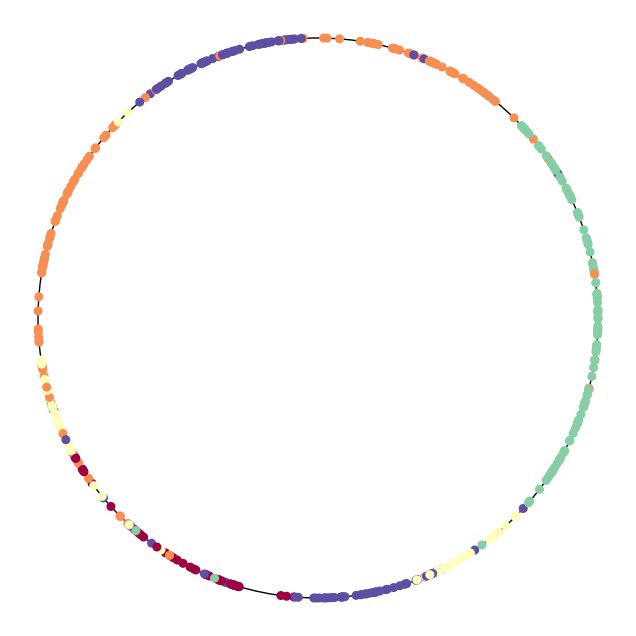

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

circle2 = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(circle2)

plt.scatter(ps_X_cosne[:,0], ps_X_cosne[:,1], c=ps.y, cmap='Spectral', s=30)
ax.set_aspect('equal')
plt.axis('off')

plt.savefig("./saved_figures/" + "CO-SNE_psH5H5.png", bbox_inches='tight', dpi=fig.dpi)
plt.show()